# GRIP: The Spark Foundation

# TSF Task-2 : Prediction Using UnSupervised Learning.

# By- Rohit Kumar

### Import all required libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from sklearn.datasets import load_iris

In [24]:
# Load iris datasets

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)


In [25]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [26]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### how do we find the optimum number of cluster for K Means?

### How does one determine the value of K?

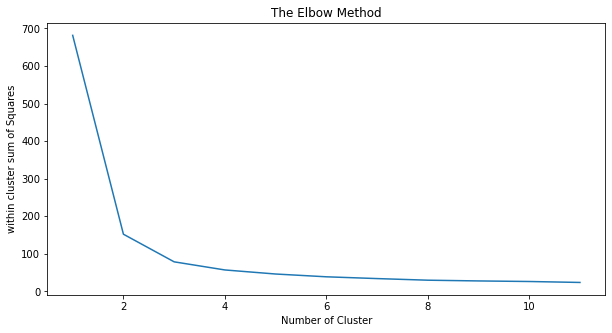

In [27]:
# Finding the optimum number of clustersfor K-Means Classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []   # within cluster sum of square

for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

# Plotting the results onto linegraph,
# allowing us to observe 'The Elbow'

plt.figure(figsize = [10,5])
plt.plot(range(1, 12), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('within cluster sum of Squares')
plt.show()

### Here, we can see why it is called "The Elbow Method", The optimum Cluster occurs where the elbow occurs.

### from this we choose the number of clusters as "3"

## Training the KMeans model

In [28]:
# now apply k-means to data set creating a classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [29]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

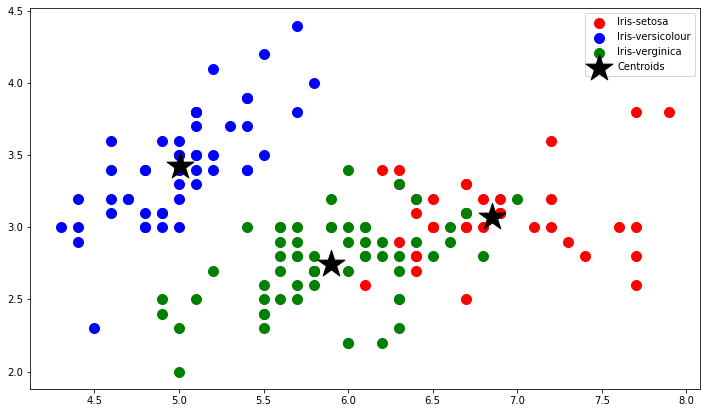

In [32]:
# Visualising the cluster - On the first two columns

plt.figure(figsize = [12,7])
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans ==0, 1], s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-verginica')

# Plotting the Centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s = 800, c = 'black', label = 'Centroids', marker = "*")

plt.legend()

## RESULT: We can see the Centre of these Clusters Centroid at middle of these Clusters respectively

## This ends our evaluation, from the above graph it is seen that there is slit intersection between Iris_setosa and Iris-verginica

In [34]:
X = iris.data
Y = iris.target

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.8, random_state = 100)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## Training Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

### Evaluate the model

In [39]:
Y_pred = model.predict(X_test)
print(Y_test)
print(Y_pred)

[2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 1 2 2 2 0 2 0 1 2 1 0 1 2]
[2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 2 2 2 2 0 2 0 1 2 1 0 1 2]


### 1) Accuracy

In [40]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test,Y_pred)
acc

0.9666666666666667

### 2) Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred,labels=[0,1,2])
cm

array([[11,  0,  0],
       [ 0,  5,  1],
       [ 0,  0, 13]], dtype=int64)

### 3) Recall Matrix (Predicted/Actual class )

In [42]:
rm = (((cm.T)/(cm.sum(axis=1))).T)
rm

array([[1.        , 0.        , 0.        ],
       [0.        , 0.83333333, 0.16666667],
       [0.        , 0.        , 1.        ]])

### 4) Precision Matrix (Actual Class / Prediction)

In [44]:
pm = (cm/cm.sum(axis=0)) #Precision
pm

array([[1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.07142857],
       [0.        , 0.        , 0.92857143]])

### 5) F1 Score

In [46]:
F1 = 2*pm*rm/(pm+rm)
F1

<ipython-input-46-b6ad37cba0ad>:1: RuntimeWarning: invalid value encountered in true_divide
  F1 = 2*pm*rm/(pm+rm)


array([[1.        ,        nan,        nan],
       [       nan, 0.90909091, 0.1       ],
       [       nan,        nan, 0.96296296]])